The purpose of this notebook is to identify periods of time in which a large number of HydroShare resources were downloaded. The goal is to determine if these occurrences correlate known HydroShare downtimes.

Note, data was downloaded from `http://public.cuahsi.org/metrics-report/`, specifically [http://public.cuahsi.org/metrics-report/09.15.2020.hs.metrics.zip](http://public.cuahsi.org/metrics-report/09.15.2020.hs.metrics.zip)

In [115]:
import pandas
import tabulate
import metricutils
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [3]:
working_directory = '09.15.2020/data'
df = metricutils.load_data(working_directory)

In [4]:
# list actions
df.action.unique()

array(['logout', 'begin_session', 'login', nan, 'delete', 'create',
       'download', 'app_launch'], dtype=object)

In [55]:
# sort by action = download
df = df[df.action == 'download']

In [56]:
df

,user_email_domain,user_ip,geoip.timezone,geoip.ip,geoip.latitude,geoip.continent_code,geoip.city_name,geoip.country_code2,geoip.country_name,geoip.dma_code,...,start,q,filepath,x,y,z,gridSet,format,layers,date
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-16 00:00:00+00:00,com,137.54.39.17,America/New_York,137.54.39.17,38.0329,NA,Charlottesville,US,United States,584.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-16 00:00:00+00:00
2017-02-16 00:00:00+00:00,org,50.199.245.193,America/New_York,50.199.245.193,42.2389,NA,Milton,US,United States,506.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-16 00:00:00+00:00
2017-02-16 00:00:00+00:00,edu,129.123.9.63,America/Denver,129.123.9.63,41.6412,NA,Logan,US,United States,770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-16 00:00:00+00:00
2017-02-16 00:00:00+00:00,edu,129.123.9.63,America/Denver,129.123.9.63,41.6412,NA,Logan,US,United States,770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-16 00:00:00+00:00
2017-02-17 00:00:00+00:00,edu,152.54.3.26,America/New_York,152.54.3.26,36.0525,NA,Chapel Hill,US,United States,560.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-17 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13 00:00:00+00:00,cmu.edu,71.199.123.243,America/New_York,71.199.123.243,40.4730,NA,Pittsburgh,US,United States,508.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-13 00:00:00+00:00
2020-09-13 00:00:00+00:00,cmu.edu,71.199.123.243,America/New_York,71.199.123.243,40.4730,NA,Pittsburgh,US,United States,508.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-13 00:00:00+00:00
2020-09-13 00:00:00+00:00,edu,47.32.24.186,America/Chicago,47.32.24.186,43.0750,NA,Madison,US,United States,669.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-13 00:00:00+00:00


In [63]:
# group by frequency. A list of acceptable frequencies can be found at https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
freq = '1min'
grouped = df.groupby(pandas.Grouper(freq=freq))
grouped_count = grouped.count()


In [64]:
# look at the stats
grouped_count.action.describe()

count    1.880641e+06
mean     2.190849e-02
std      2.695305e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.389000e+03
Name: action, dtype: float64

In [65]:
# isolate all days in which there were more than a specfied number of downloads
threshold = 500

high_usage = grouped_count[grouped_count.action >= threshold]

print(f'There are {len(high_usage)} days that had at least {threshold} downloads per {freq}')

There are 4 days that had at least 500 downloads per 1min


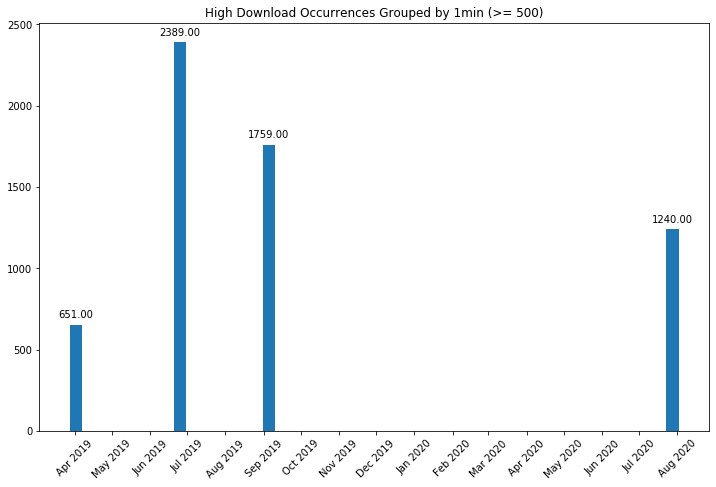

In [66]:
width = 10
title = f'High Download Occurrences Grouped by {freq} (>= {threshold})'

fig, ax = plt.subplots(figsize=(12, 9))
ax.set_title(title)
ax.bar(high_usage.index, high_usage['action'], width=width)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),
                (p.get_x() + p.get_width() / 2.,
                p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

# add monthly minor ticks
plt.subplots_adjust(bottom=0.25)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

### Get more info about these locations

In [84]:
df_sub = df.loc[grouped.count()['action'] > threshold]
df_sub = df_sub.sort_index()
assert (df_sub.index.unique().values == high_usage.index.unique().values).all()

In [104]:
df_details = df_sub.groupby(df_sub.index).agg({'user_email_domain': list,
                                               'user_ip': list,
                                               'geoip.city_name': list,
                                               'geoip.country_name': list,
                                               'user_id': list,
                                               'client_host': list,
                                               'resource_guid': list,
                                               'action': 'count'})

In [109]:
res_guids = pandas.Series(df_details.iloc[0].resource_guid)

In [136]:
a = res_guids.describe()

In [137]:
a.index

Index(['count', 'unique', 'top', 'freq'], dtype='object')

In [ ]:
# loop through time groups
# loop through columns and describe stats.
# put into a table

In [114]:

#

In [141]:
headers = ['count', 'unique', 'top', 'freq']
for dt, row in df_details.iterrows():
    table = []
    for colname in df_details.columns:
        stats = pandas.Series(row[colname]).describe()
        table.append([colname]+list(stats.values))
    print(dt)
    print(tabulate.tabulate(table, headers=headers))
    print('\n')
        
        
    

2019-04-02 00:00:00+00:00
                      count    unique  top                                 freq
------------------  -------  --------  --------------------------------  ------
user_email_domain       651         7  gov                                  590
user_ip                 651        12  134.67.153.41                        590
geoip.city_name         651        12  Durham                               590
geoip.country_name      651         2  United States                        649
user_id                 651        12  4266                                 590
client_host             644        10  unassigned.epa.gov                   590
resource_guid           651        14  671fefb82cc94504a6734717d8aae48d     590
action                    1       651  nan                                  651


2019-06-25 00:00:00+00:00
                      count    unique  top                                           freq
------------------  -------  --------  -----------------

In [135]:
table

[['user_email_domain', 1240, 7, 'gov', 1223],
 ['user_ip', 1240, 9, '134.67.29.88', 1223],
 ['geoip.city_name', 15, 6, 'Mittweida', 7],
 ['geoip.country_name', 1240, 3, 'United States', 1232],
 ['user_id', 1240, 9, '4266', 1223],
 ['client_host', 1236, 8, 'unassigned.epa.gov', 1223],
 ['resource_guid', 1240, 12, '671fefb82cc94504a6734717d8aae48d', 1223],
 ['action', 1.0, 1240.0, nan, 1240.0, 1240.0, 1240.0, 1240.0, 1240.0]]